<a href="https://colab.research.google.com/github/Md-Aziz-Developer/tensorflow-learning/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable bases on some other combination of variables, even shorter... predictiing a number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating data to view and fit

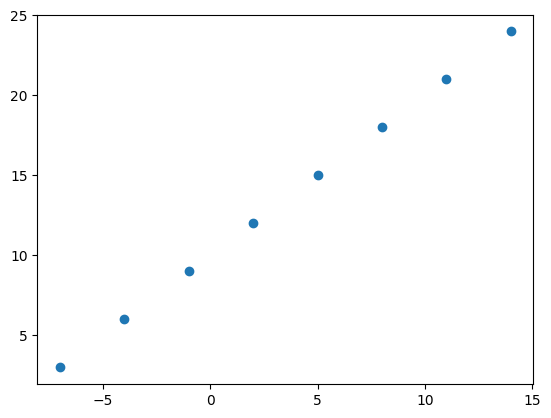

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0, -4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y==X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [4]:
# Create a demo tensor for our housing price prediction problem
housing_info=tf.constant(['bedroom','bathroom','garage'])
housing_price=tf.constant([939700])
housing_info, housing_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].shape, y[0].shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn our NUmPy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

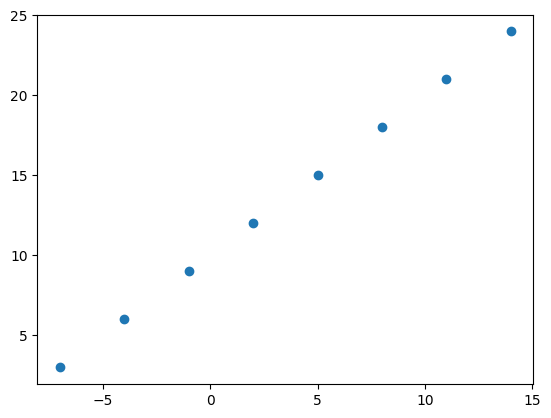

In [13]:
plt.scatter(X,y)

## Steps in modeling with tensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in pther words, the function which tells our model how erong it is) and the optimizer (tell our model how to improve the patterns its learning) an evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short form of stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.2491 - mae: 11.2491
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.1166 - mae: 11.1166
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.9841 - mae: 10.9841
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.8516 - mae: 10.8516
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.7191 - mae: 10.7191
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.5866 - mae: 10.5866
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.4541 - mae: 10.4541
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.3216 - mae: 10.3216
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10.1891 - mae: 10.1891
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.0566 - mae: 10.0566
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.9241 - mae: 9.9241
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 9.7916 - mae: 9.7916
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53m

In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_preds=model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


In [17]:
y_preds

array([[23.032799]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of  the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model example to learn from).

In [18]:
# Let's rebuild our model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step - loss: 13.1618 - mae: 13.1618
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.0293 - mae: 13.0293
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.8968 - mae: 12.8968
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.7643 - mae: 12.7643
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.6318 - mae: 12.6318
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.4993 - mae: 12.4993
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.3668 - mae: 12.3668
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.2343 - mae: 12.2343
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.1018 - mae: 12.1018
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.9693 - mae: 11.9693
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.8368 - mae: 11.8368
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.7043 - mae: 11.7043
Epoch 13/100
1/1 ━━━━━━━

In [19]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Let's see if our model's prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[29.877693]], dtype=float32)

In [21]:
# Let's rebuild our model again (this time we added an extra hidden layer with 100 hidden units)

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step - loss: 13.4070 - mae: 13.4070
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.8586 - mae: 12.8586
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.3055 - mae: 12.3055
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.7466 - mae: 11.7466
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.1836 - mae: 11.1836
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.6271 - mae: 10.6271
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.0617 - mae: 10.0617
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.5350 - mae: 9.5350
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.9950 - mae: 8.9950
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.4223 - mae: 8.4223
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8169 - mae: 7.8169
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.1666 - mae: 7.1666
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [22]:
# Let's see if our model's prediction has improved after adding hidden layer
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[31.69002]], dtype=float32)

In [23]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), # Decrease the hidden layer unit to 50 and activation to default
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 12.1905 - mae: 12.1905
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.6660 - mae: 11.6660
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.1333 - mae: 11.1333
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.5894 - mae: 10.5894
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.0318 - mae: 10.0318
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.4574 - mae: 9.4574
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.8634 - mae: 8.8634
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.2466 - mae: 8.2466
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.6040 - mae: 7.6040
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.2824 - mae: 7.2824
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.2627 - mae: 7.2627
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.2429 - mae: 7.2429
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [24]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[32.070496]], dtype=float32)

In [25]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # change the optimizer to Adam
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step - loss: 12.0288 - mae: 12.0288
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.9584 - mae: 11.9584
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.8878 - mae: 11.8878
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.8172 - mae: 11.8172
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.7465 - mae: 11.7465
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.6756 - mae: 11.6756
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.6047 - mae: 11.6047
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.5337 - mae: 11.5337
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.4625 - mae: 11.4625
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.3912 - mae: 11.3912
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.3198 - mae: 11.3198
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.2482 - mae: 11.2482
Epoch 13/100
1/1 ━━━━━━━

In [26]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[31.195425]], dtype=float32)

In [27]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Add learning rate to 0.01
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step - loss: 14.4294 - mae: 14.4294
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.7688 - mae: 13.7688
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.1134 - mae: 13.1134
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.4612 - mae: 12.4612
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8083 - mae: 11.8083
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.1521 - mae: 11.1521
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.4907 - mae: 10.4907
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.8223 - mae: 9.8223
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.1445 - mae: 9.1445
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.4542 - mae: 8.4542
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.7485 - mae: 7.7485
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.0239 - mae: 7.0239
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [28]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[25.727888]], dtype=float32)

In [29]:
model.predict(np.array([21.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[29.488348]], dtype=float32)

## Evaluating a model

In Practice, a typical workflow you'll go through when building neural networks is :

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

when it comes to evaluation... there a re 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data-what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [30]:
# Make a bigger dataset
X= tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

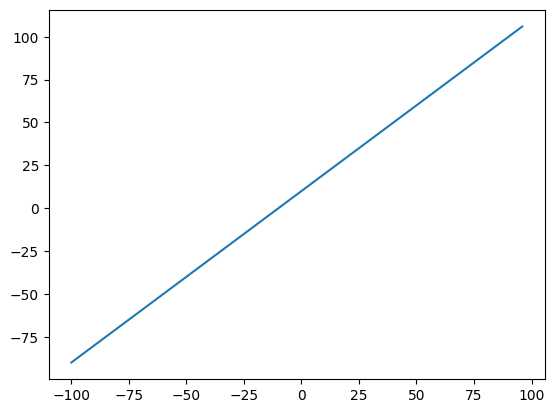

In [32]:
# Visualize the data
plt.plot(X,y)

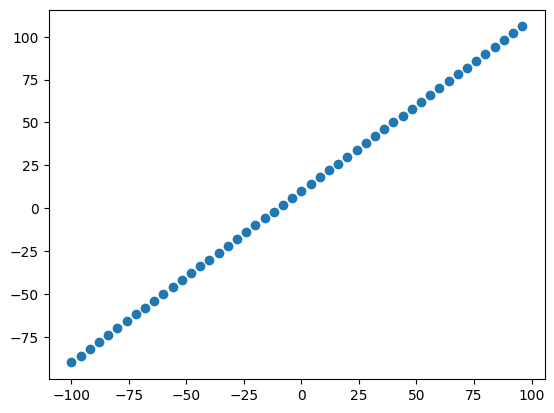

In [33]:
plt.scatter(X,y)

### The 3 sets...

* **Traning set** - the model learns from this data, whihc is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is model has learned, this set is typically 10-15% of the total data available.

In [34]:
# Check the length of how many samples we have
len(X)

50

In [35]:
# Split the data into train and test sets
X_train=X[:40] # first 40 are training samples (80% of the data)
y_train=y[:40]

X_test=X[40:] # last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data
Now we've got our data in training and test sets.. let's visualize it again!

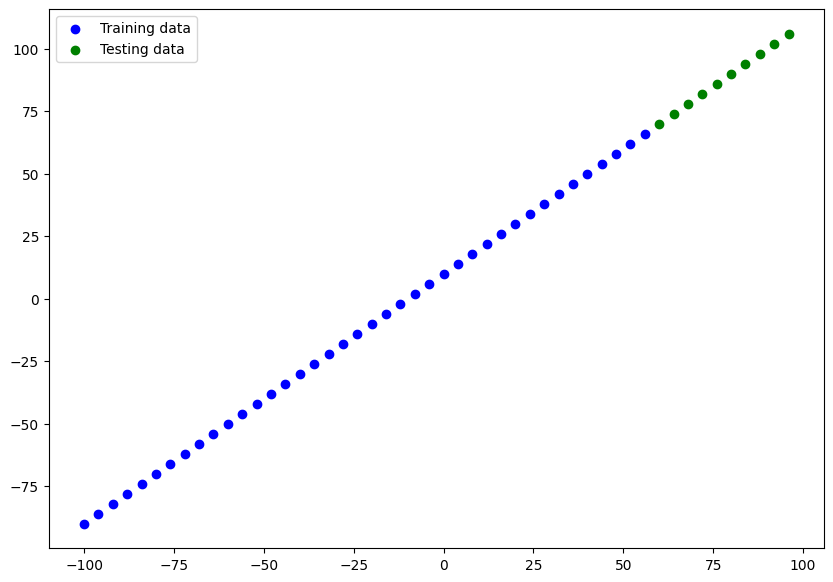

In [36]:
plt.figure(figsize=(10,7))
# Plot traning data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data ub green
plt.scatter(X_test, y_test,c="g", label="Testing data")
# Show a legend
plt.legend();

In [37]:
# Let's have a look how to build a neural network for our data

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100)

In [38]:
# Visualizing the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1),y, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't update during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resources:** For more in-depth overview of the trainable parameters within the layer, check out MIT's introduction to deep learning video. https://www.youtube.com/watch?v=ErnWZxJovaM&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

**Exercise:** Try playing with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [41]:
# Let's fit our model to the traning data
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.1894 - mae: 12.1894 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.4852 - mae: 12.4852 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4195 - mae: 8.4195 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1679 - mae: 9.1679 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2340 - mae: 8.2340 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9070 - mae: 8.9070 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9502 - mae: 7.9502 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5889 - mae: 9.5889 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9324 - mae: 7.9324 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5773 - mae: 9.5773 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9145 - mae: 7.9145 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.5657 - mae: 9.5657 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms

In [42]:
# Get a summary of our model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

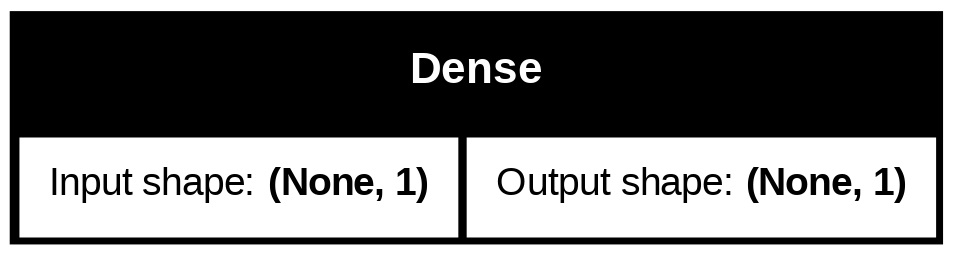

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [44]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [45]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38.8064 - mae: 38.8064 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.3569 - mae: 29.3569
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.6580 - mae: 25.6580 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.4710 - mae: 20.4710 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.2656 - mae: 18.2656 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.3101 - mae: 17.3101 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8791 - mae: 11.8791 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.7363 - mae: 14.7363 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.5289 - mae: 15.5289 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5992 - mae: 11.5992 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.5608 - mae: 14.5608 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.6011 - mae: 15.6011 
Epoch 13/100
2/2 ━━━━━━━

In [47]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

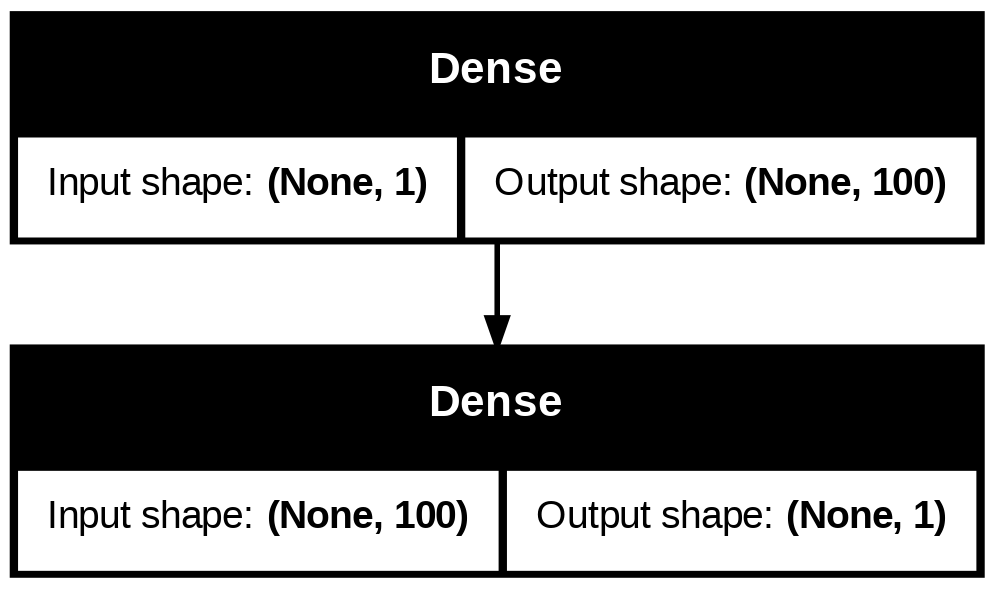

In [48]:
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the groud truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions).

In [49]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[37.642998],
       [40.046196],
       [42.449398],
       [44.8526  ],
       [47.2558  ],
       [49.658997],
       [52.062206],
       [54.4654  ],
       [56.868603],
       [59.27181 ]], dtype=float32)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of funtinality in the future, it's a good idea to turn it into a function.

In [51]:
# Let's create plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots traning data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data,predictions, c="r",label="Predictions")
  # Show the legend
  plt.legend();

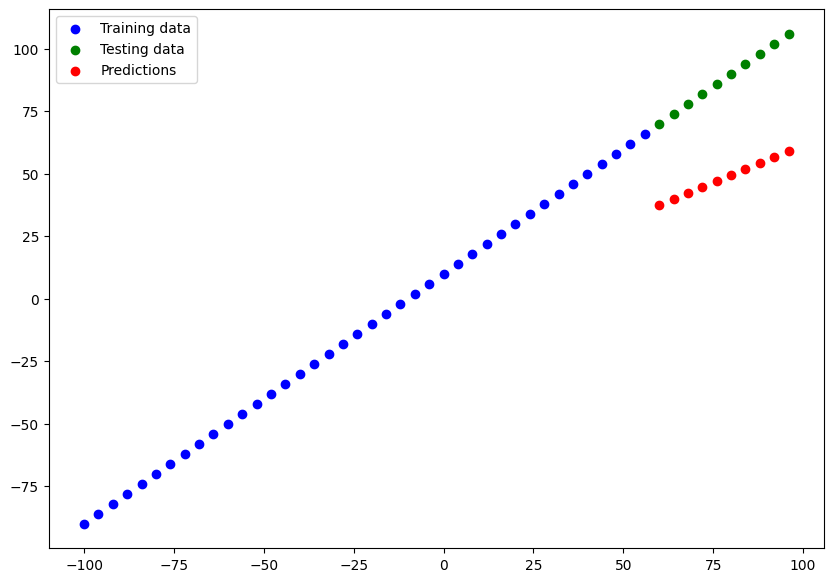

In [52]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [53]:
# Let's refine our model by tunning the hyperparameters

# Create another model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                  metrics=["mae"]
                  )


In [54]:
# Get the model summary
new_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Fit the model
new_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 41.3215 - mae: 41.3215  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.0250 - mae: 23.0250 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5562 - mae: 8.5562 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8142 - mae: 14.8142 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3858 - mae: 17.3858 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.3838 - mae: 14.3838 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2745 - mae: 10.2745 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6601 - mae: 7.6601 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.4739 - mae: 10.4739 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6430 - mae: 9.6430 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9527 - mae: 6.9527 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0804 - mae: 8.0804 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [56]:
# Get the predictions of our model
y_pred=new_model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[ 68.69775 ],
       [ 72.61283 ],
       [ 76.52791 ],
       [ 80.442986],
       [ 84.35806 ],
       [ 88.27315 ],
       [ 92.18822 ],
       [ 96.1033  ],
       [100.01839 ],
       [103.933464]], dtype=float32)

In [57]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

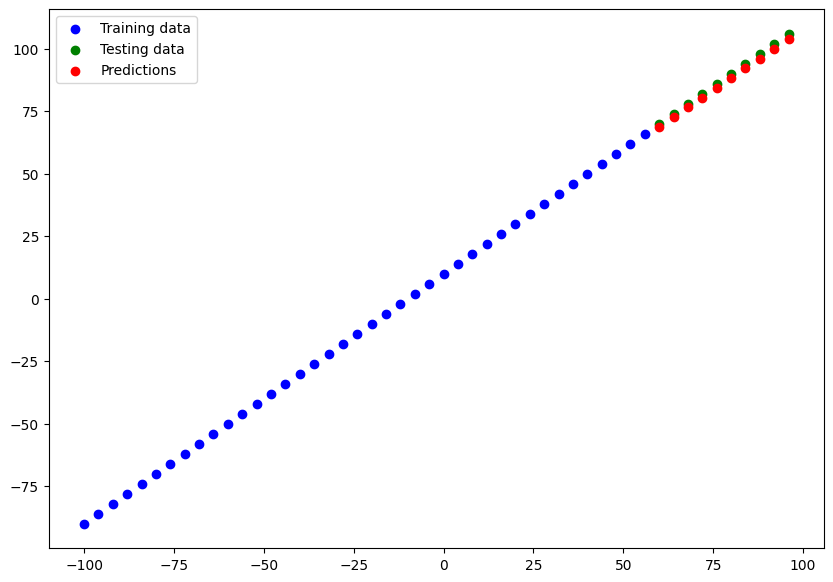

In [58]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [59]:
## Almost predictions match with our true value let's tune more by adding more hidden layer and change learning rate by 0.02 and epochs to 150

# Create another model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(100), # Added extra 100 unit hidden layer
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.02)),
                  metrics=["mae"]
                  )

In [60]:
new_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
new_model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=150, verbose=1)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 61.6263 - mae: 61.6263
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 51.3734 - mae: 51.3734 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.0575 - mae: 44.0575 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.1542 - mae: 43.1542 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.5556 - mae: 20.5556 
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.5092 - mae: 12.5092 
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.2107 - mae: 14.2107 
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0599 - mae: 16.0599 
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.1508 - mae: 19.1508 
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7924 - mae: 6.7924 
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.7295 - mae: 11.7295 
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5869 - mae: 5.5869 
Epoch 13/150
2/2 ━━━━━━━━━━━━━

In [62]:
y_pred=new_model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[ 76.55901 ],
       [ 80.96937 ],
       [ 85.37972 ],
       [ 89.7901  ],
       [ 94.200455],
       [ 98.61082 ],
       [103.02119 ],
       [107.43156 ],
       [111.84193 ],
       [116.25228 ]], dtype=float32)

In [63]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

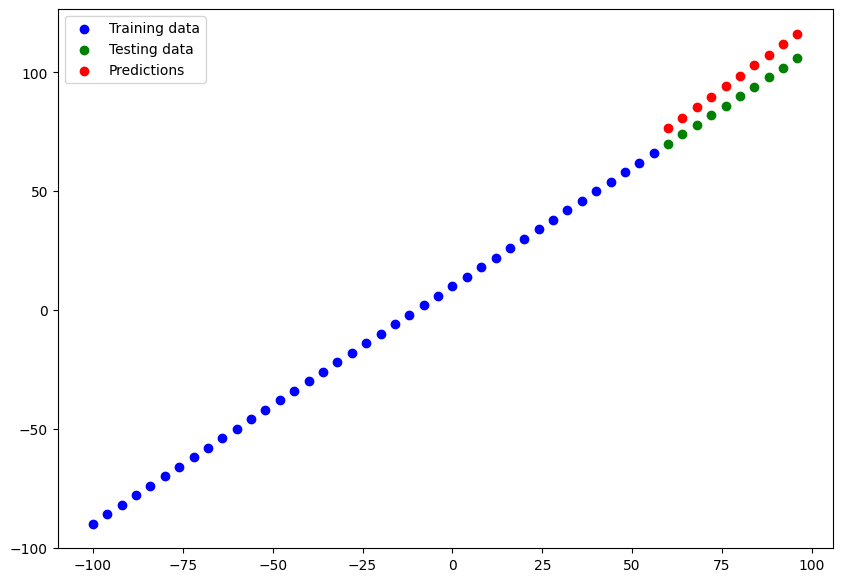

In [64]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [65]:
## After more tunning the prediction not improving instead of it get worse then previous one so let's stick on previous one

# Create another model
new_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                  metrics=["mae"]
                  )

# Fit the model
new_model2.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 52.2754 - mae: 52.2754  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.5676 - mae: 31.5676 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.5678 - mae: 12.5678 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.4815 - mae: 12.4815 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1199 - mae: 16.1199 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1047 - mae: 15.1047 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6249 - mae: 11.6249 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8059 - mae: 7.8059 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5405 - mae: 10.5405 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.6050 - mae: 11.6050 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9590 - mae: 8.9590 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0479 - mae: 7.0479 
Epoch 13/100
2/2 ━━━━━━━━━━━━━

In [66]:
y_pred=new_model2.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[ 68.96697 ],
       [ 72.90013 ],
       [ 76.8333  ],
       [ 80.766464],
       [ 84.69963 ],
       [ 88.6328  ],
       [ 92.565956],
       [ 96.49913 ],
       [100.43229 ],
       [104.36546 ]], dtype=float32)

In [67]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

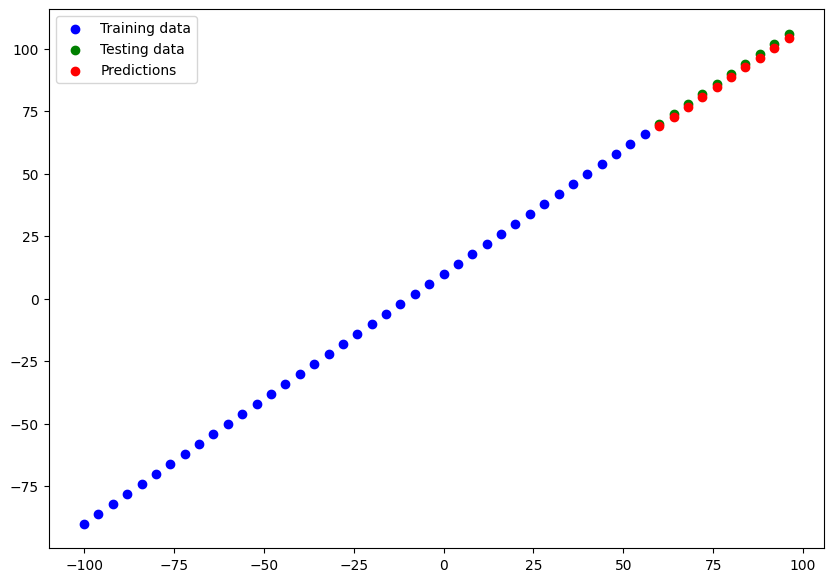

In [68]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be diffreenr evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [69]:
# Evaluate the model on the test set
new_model2.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 1.3338 - mae: 1.3338


[1.3337867259979248, 1.3337867259979248]

In [70]:
y_pred

array([[ 68.96697 ],
       [ 72.90013 ],
       [ 76.8333  ],
       [ 80.766464],
       [ 84.69963 ],
       [ 88.6328  ],
       [ 92.565956],
       [ 96.49913 ],
       [100.43229 ],
       [104.36546 ]], dtype=float32)

In [71]:
# Calculate the mean absolute error
mae=tf.metrics.mae(y_true=y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.0330276, 1.0998688, 1.1667023, 1.2335358, 1.3003693, 1.3672028,
       1.4340439, 1.5008698, 1.5677109, 1.6345367], dtype=float32)>

In [72]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.96697 ],
       [ 72.90013 ],
       [ 76.8333  ],
       [ 80.766464],
       [ 84.69963 ],
       [ 88.6328  ],
       [ 92.565956],
       [ 96.49913 ],
       [100.43229 ],
       [104.36546 ]], dtype=float32)>

In [73]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [74]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.96697 ,  72.90013 ,  76.8333  ,  80.766464,  84.69963 ,
        88.6328  ,  92.565956,  96.49913 , 100.43229 , 104.36546 ],
      dtype=float32)>

In [75]:
# Calculate the mean absolute error
mae=tf.metrics.mae(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.3337867>

In [76]:
# Calculate the mean square error
mse=tf.metrics.mse(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.8158386>

In [77]:
# Make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mae(y_true=y_true,y_pred=y_pred)

def mse(y_true,y_pred):
  return tf.metrics.mse(y_true=y_true,y_pred=y_pred)


### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give you model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:
1. `model_1` - same as the original model 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.